# TASK 6

# <CENTER> Prediction Using Decision Tree Algorithm <center>(Level : Intermediate)

# CODED BY: NILKANTHA BAG

<B>URL FOR DATASET: https://bit.ly/3kXTdox

# Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.apply(np.max)

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [7]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# visualisation for better understanding  of the data

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

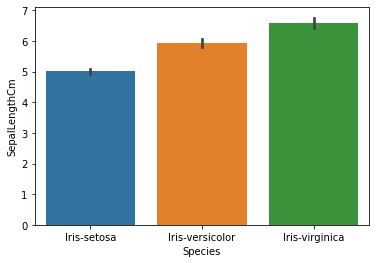

In [8]:
sns.barplot(y=iris["SepalLengthCm"],x=iris["Species"])

<b>Showing How SepalLength and PetalLength Varies

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

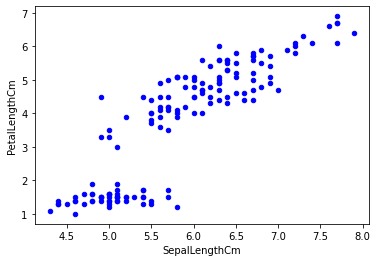

In [9]:
iris.plot(x = "SepalLengthCm", y = "PetalLengthCm", kind = 'scatter',c="b")

D:\APP\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

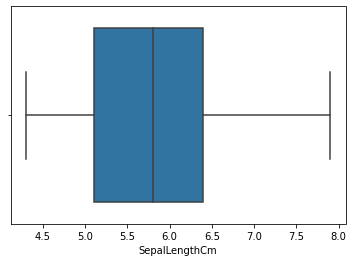

In [10]:
sns.boxplot(iris["SepalLengthCm"])

<AxesSubplot:ylabel='Frequency'>

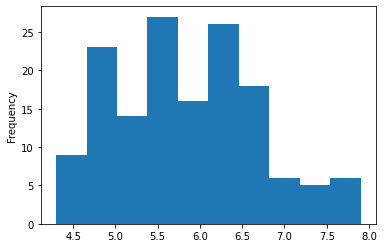

In [11]:
iris['SepalLengthCm'].plot(kind = 'hist')

<AxesSubplot:ylabel='Density'>

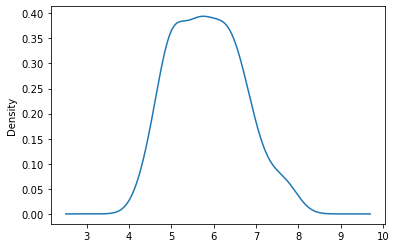

In [12]:
iris['SepalLengthCm'].plot(kind = 'kde')

D:\APP\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

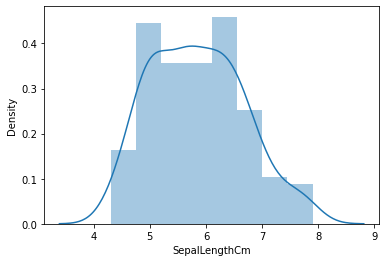

In [13]:
sns.distplot(iris["SepalLengthCm"])

<B>A Simple Pair Plot

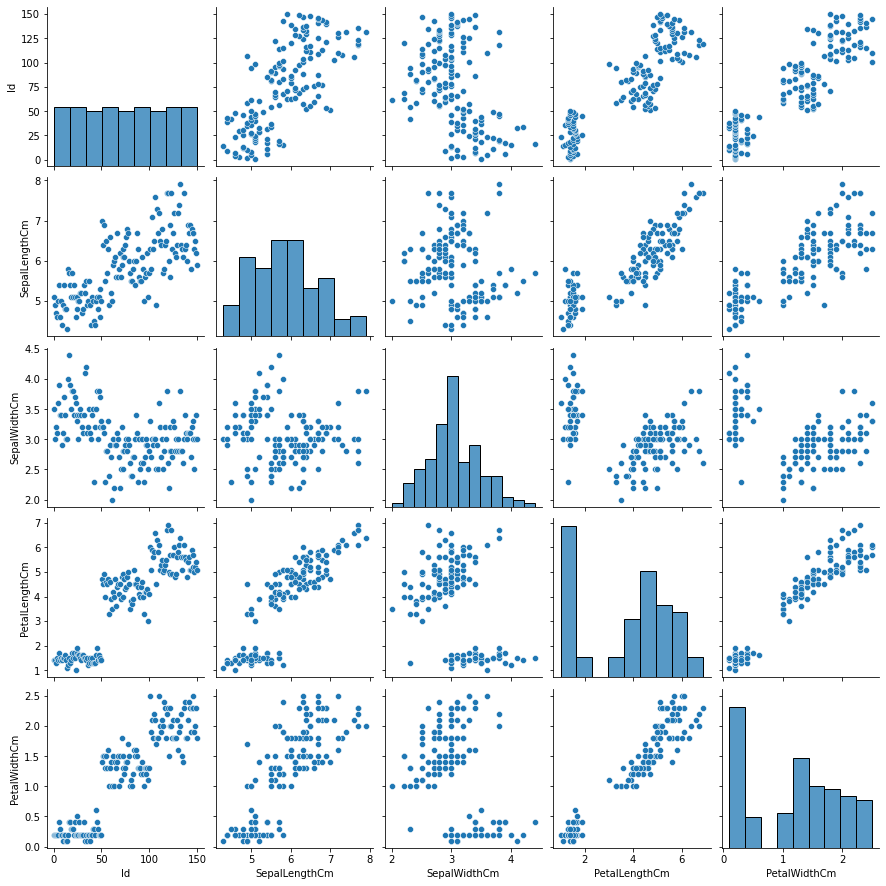

In [14]:
sns.pairplot(iris)

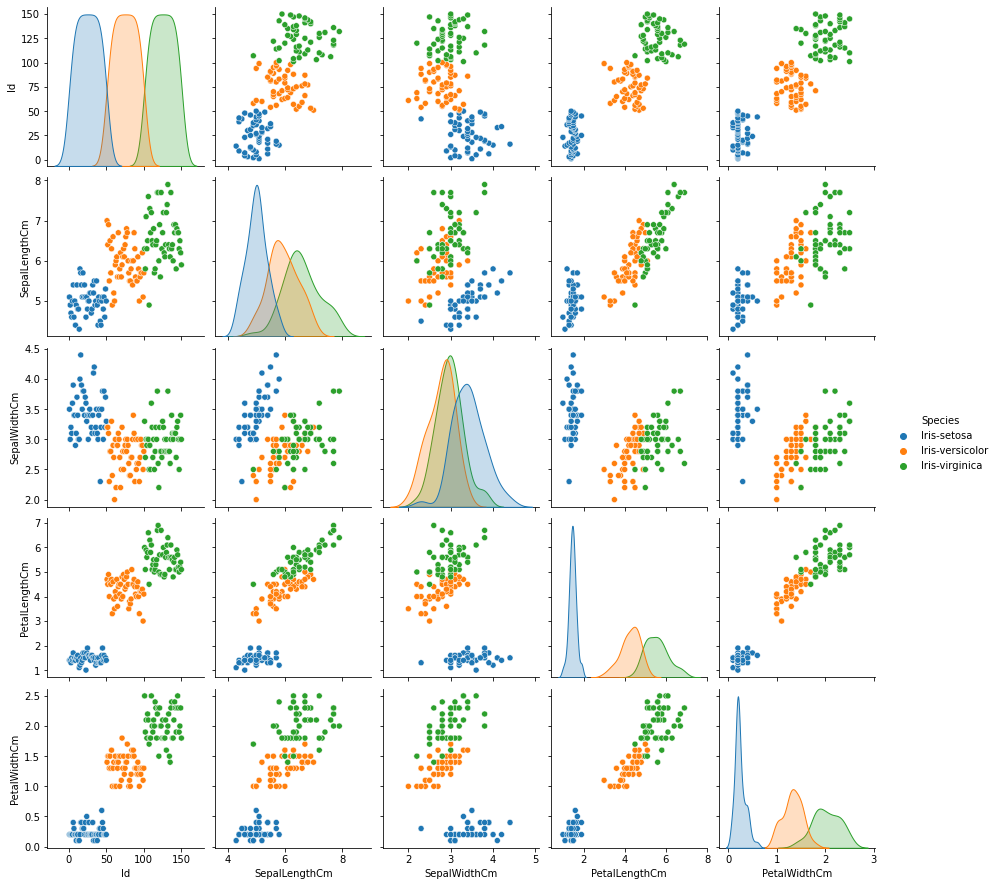

In [15]:
sns.pairplot(iris,hue="Species")

<B>A Simple Line Plot

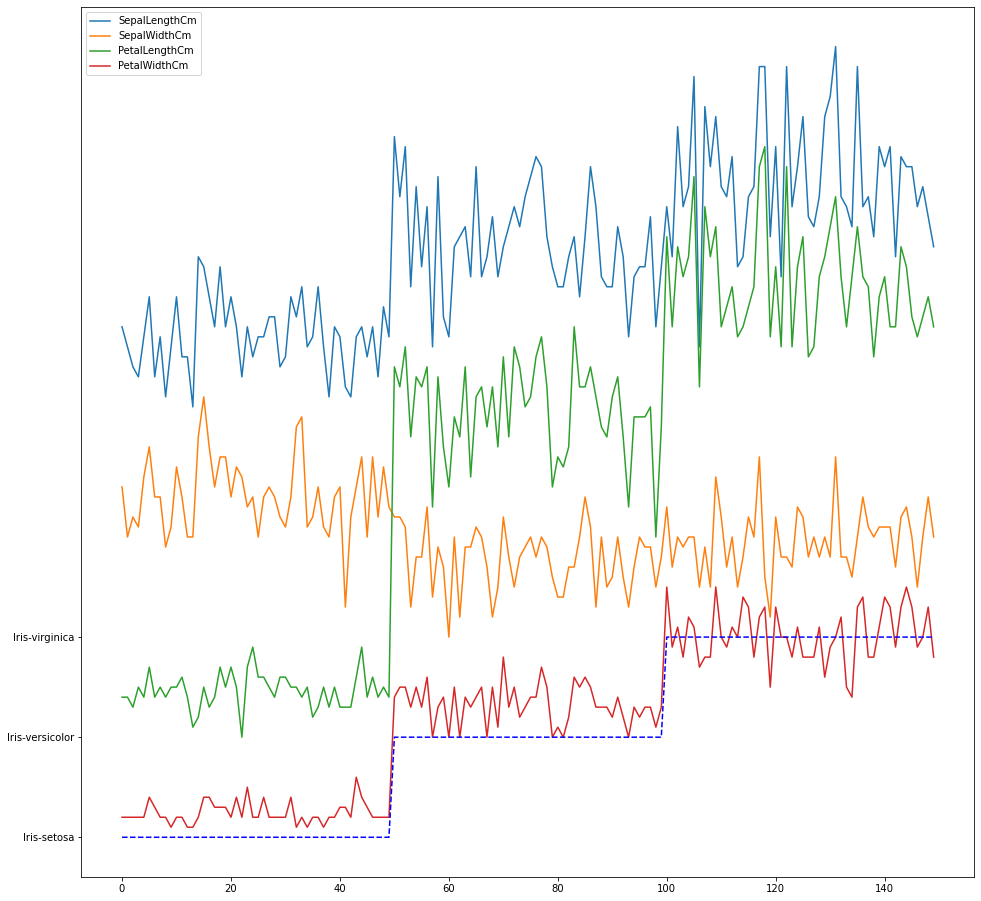

In [16]:
plt.figure(figsize=(16,16))

plt.plot(iris['SepalLengthCm'], linestyle = 'solid')
plt.plot(iris['SepalWidthCm'], linestyle = 'solid')
plt.plot(iris['PetalLengthCm'], linestyle = 'solid')
plt.plot(iris['PetalWidthCm'], linestyle = 'solid')
plt.plot(iris['Species'],color = 'blue',linestyle='--') # species of flowers
plt.legend([ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Now let us define the Decision Tree Algorithm

In [17]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Test Train Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)


# Training The Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(X_train, y_train)
print("Training completed")

Training completed


In [20]:
y_test_pred = classifier.predict(X_test)

In [21]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [22]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

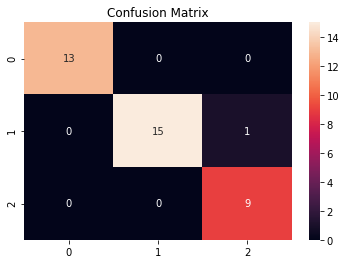

In [23]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

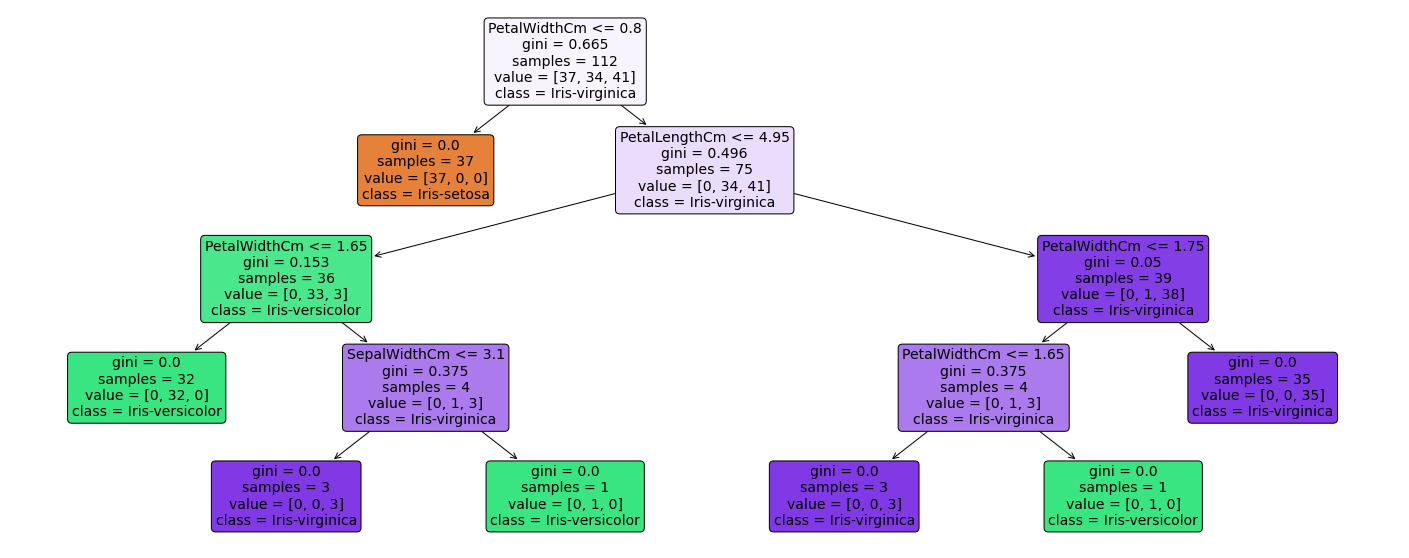

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, 
              class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

# We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly

In [25]:
pred = classifier.predict([[4.8,5.6,4,5.3]])

In [26]:
pred

array(['Iris-versicolor'], dtype=object)

# Conclusion:
<h1> <b>After providing a Random Dataset, Our model predicts Label As <B><u>'Iris-versicolor' <u><B> based on Decision Tree Algorithm Classifier.

# <B> <center> THANK YOU!!